#### K-Means on CDR (call detail records) of 10 users in Dallas, Texas
* use call location to identify user home address
* compare weekend and weekday calls

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the CDR data
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'CDR.csv'
X = pd.read_csv(fname)

In [3]:
# convert string to datetime & time delta
Z = pd.to_datetime(X.CallDate)
Z2 = pd.to_timedelta(X.CallTime)
X2 = X.drop(axis = 1, labels = ['CallDate', 'CallTime'])
X2 = pd.concat([X2, Z, Z2], axis = 1)

In [4]:
# obtain a list of distinct incoming phone calls
incoming = X2.In.unique()
incoming

array([4638472273, 1559410755, 4931532174, 2419930464, 1884182865,
       3688089071, 4555003213, 2068627935, 2894365987, 8549533077])

In [47]:
centroids[idc,:]

array([-96.80231738,  32.95821508])

Cluster Inertia:  0.158910695238
Cluster  0 :  959 Samples [-96.90951639  32.9000009 ]
Cluster  1 :  306 Samples [-96.70816184  32.73323174]
Cluster  2 :  140 Samples [-96.83818346  32.86348712]


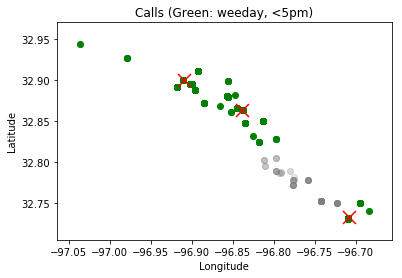

User's waypoint time:  0 days 07:49:53.168115
Cluster Inertia:  0.265744617758
Cluster  0 :  3121 Samples [-96.93522725  32.69557708]
Cluster  1 :  921 Samples [-96.92355104  32.87096795]
Cluster  2 :  360 Samples [-96.9164561   32.73762409]


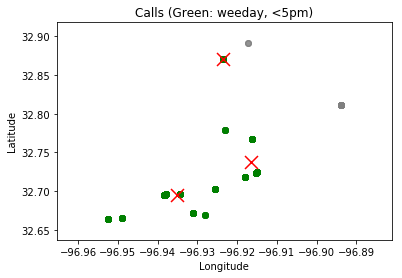

User's waypoint time:  0 days 07:50:31.646646
Cluster Inertia:  0.0195509698781
Cluster  0 :  197 Samples [-96.86563953  32.86562866]
Cluster  1 :  846 Samples [-96.89338791  32.77992299]
Cluster  2 :  88 Samples [-96.88911725  32.81309497]


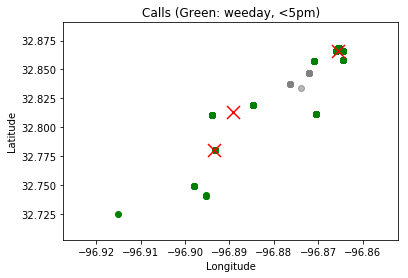

User's waypoint time:  0 days 07:53:05.627397
Cluster Inertia:  0.001334826613
Cluster  0 :  701 Samples [-96.8472893   32.85371225]
Cluster  1 :  241 Samples [-96.83511392  32.84684682]
Cluster  2 :  34 Samples [-96.849683    32.86284941]


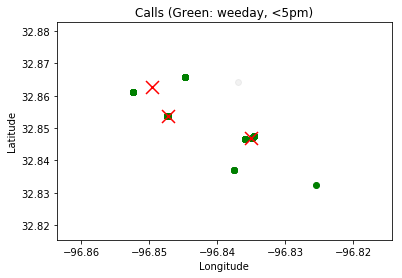

User's waypoint time:  0 days 11:09:10.422402
Cluster Inertia:  0.00758396019699
Cluster  0 :  827 Samples [-96.75768121  32.92195886]
Cluster  1 :  169 Samples [-96.730278  32.875   ]
Cluster  2 :  65 Samples [-96.741944  32.909167]


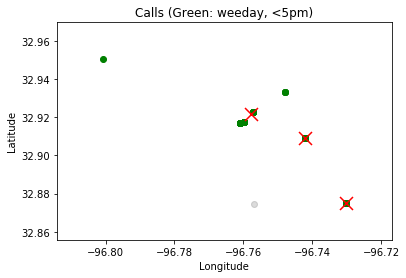

User's waypoint time:  0 days 07:48:00.978543
Cluster Inertia:  0.0474598907576
Cluster  0 :  456 Samples [-96.87034706  32.81198486]
Cluster  1 :  128 Samples [-96.685556  32.770833]
Cluster  2 :  77 Samples [-96.81450799  32.80241723]


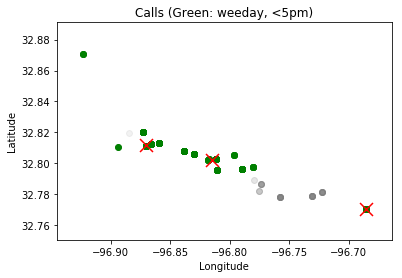

User's waypoint time:  0 days 07:46:28.366518
Cluster Inertia:  0.0382847692271
Cluster  0 :  53 Samples [-96.796111  32.7375  ]
Cluster  1 :  707 Samples [-96.74437494  32.75203793]
Cluster  2 :  184 Samples [-96.84066398  32.70494423]


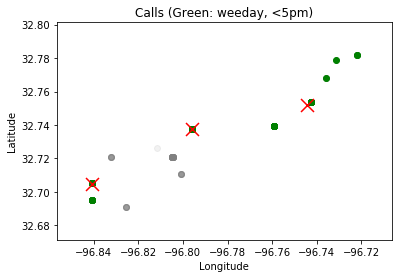

User's waypoint time:  0 days 07:58:52.698478
Cluster Inertia:  0.246739042384
Cluster  0 :  392 Samples [-96.604444  32.703056]
Cluster  1 :  1648 Samples [-96.83039184  32.72097347]
Cluster  2 :  254 Samples [-96.75520357  32.71410598]


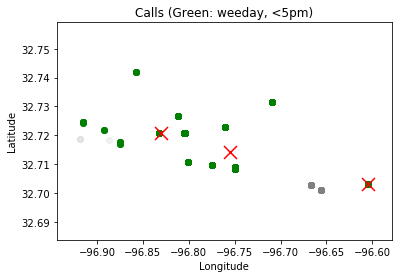

User's waypoint time:  0 days 07:49:09.050047
Cluster Inertia:  0.0805346850954
Cluster  0 :  298 Samples [-96.857611  32.741889]
Cluster  1 :  1077 Samples [-96.81270407  32.77396536]
Cluster  2 :  3465 Samples [-96.89115458  32.72145328]


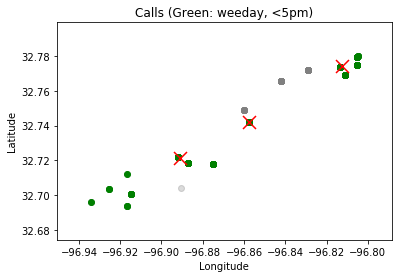

User's waypoint time:  0 days 07:48:21.025597
Cluster Inertia:  0.203625183795
Cluster  0 :  2170 Samples [-96.80262338  32.98500948]
Cluster  1 :  576 Samples [-96.77896656  32.77240328]
Cluster  2 :  304 Samples [-96.80360535  32.93033402]


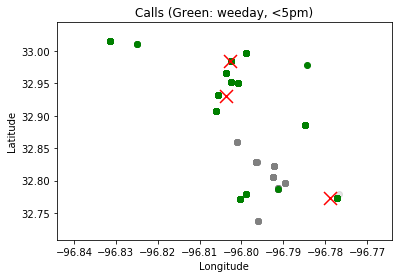

User's waypoint time:  0 days 07:51:00.414270


In [53]:
# look at each user one by one
workloc = np.zeros((len(incoming), 2))
for iuser in range(len(incoming)):
    Y = X2[X.In == incoming[iuser]]

    # focus on weekdays
    Y2 = Y[(Y.DOW != 'Sat') & (Y.DOW != 'Sun')]
    # & those before 5pm
    Y2 = Y2[Y2.CallTime < '17:00:00']

    # show the call locations
    plt.scatter(Y.TowerLon, Y.TowerLat, c='gray', alpha=0.1)
    plt.scatter(Y2.TowerLon, Y2.TowerLat, c='g', marker='o')
    plt.title('Calls (Green: weeday, <5pm)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # K cluster on the call location
    K = 3
    Z = Y2.loc[:, ['TowerLon', 'TowerLat']]
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(Z)
    KMeans(n_clusters = K, max_iter = 300, n_init = 10, init = 'k-means++', copy_x = True,
           n_jobs = 1, precompute_distances = 'auto', random_state = None, tol = 1e-4,
           verbose = 0)
    centroids = kmeans.cluster_centers_
    # show the cluster info
    print("Cluster Inertia: ", kmeans.inertia_)
    Nsamples = np.zeros(K)
    for i in range(K):
        Nsamples[i] = (kmeans.labels_ == i).sum()
        print("Cluster ", i, ": ", int(Nsamples[i]), "Samples", centroids[i])
    # plot
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', linewidths=3, s=169)
    plt.show()

    # show the time (mean) when the user is between home & work
    idc = np.argmin(Nsamples)
    time = Y2.CallTime[kmeans.labels_ == idc].mean()
    print("User's waypoint time: ", time)
    
    # save the work coordinates for future use
    idc = np.argmax(Nsamples)
    workloc[iuser,:] = centroids[idc,:]

In [51]:
# find the user who works near US Post Office near Cockrell Hill Rd
workloc

array([[-96.90967196,  32.9001744 ],
       [-96.93522725,  32.69557708],
       [-96.893333  ,  32.780278  ],
       [-96.8472893 ,  32.85371225],
       [-96.75721678,  32.92280779],
       [-96.87034706,  32.81198486],
       [-96.74243422,  32.75365378],
       [-96.83278954,  32.72089181],
       [-96.89201378,  32.72165711],
       [-96.802574  ,  32.98580109]])